In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump
from xgboost import XGBRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\2986201397.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Comecou!!


C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\1707438210.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[i, item] = 1
C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\1707438210.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[i, item] = 1
C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\1707438210.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

Rows: 20058
Columns: 939


C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\1707438210.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = preds


Accuracy: 0.928963110667996


<Figure size 1000x800 with 0 Axes>

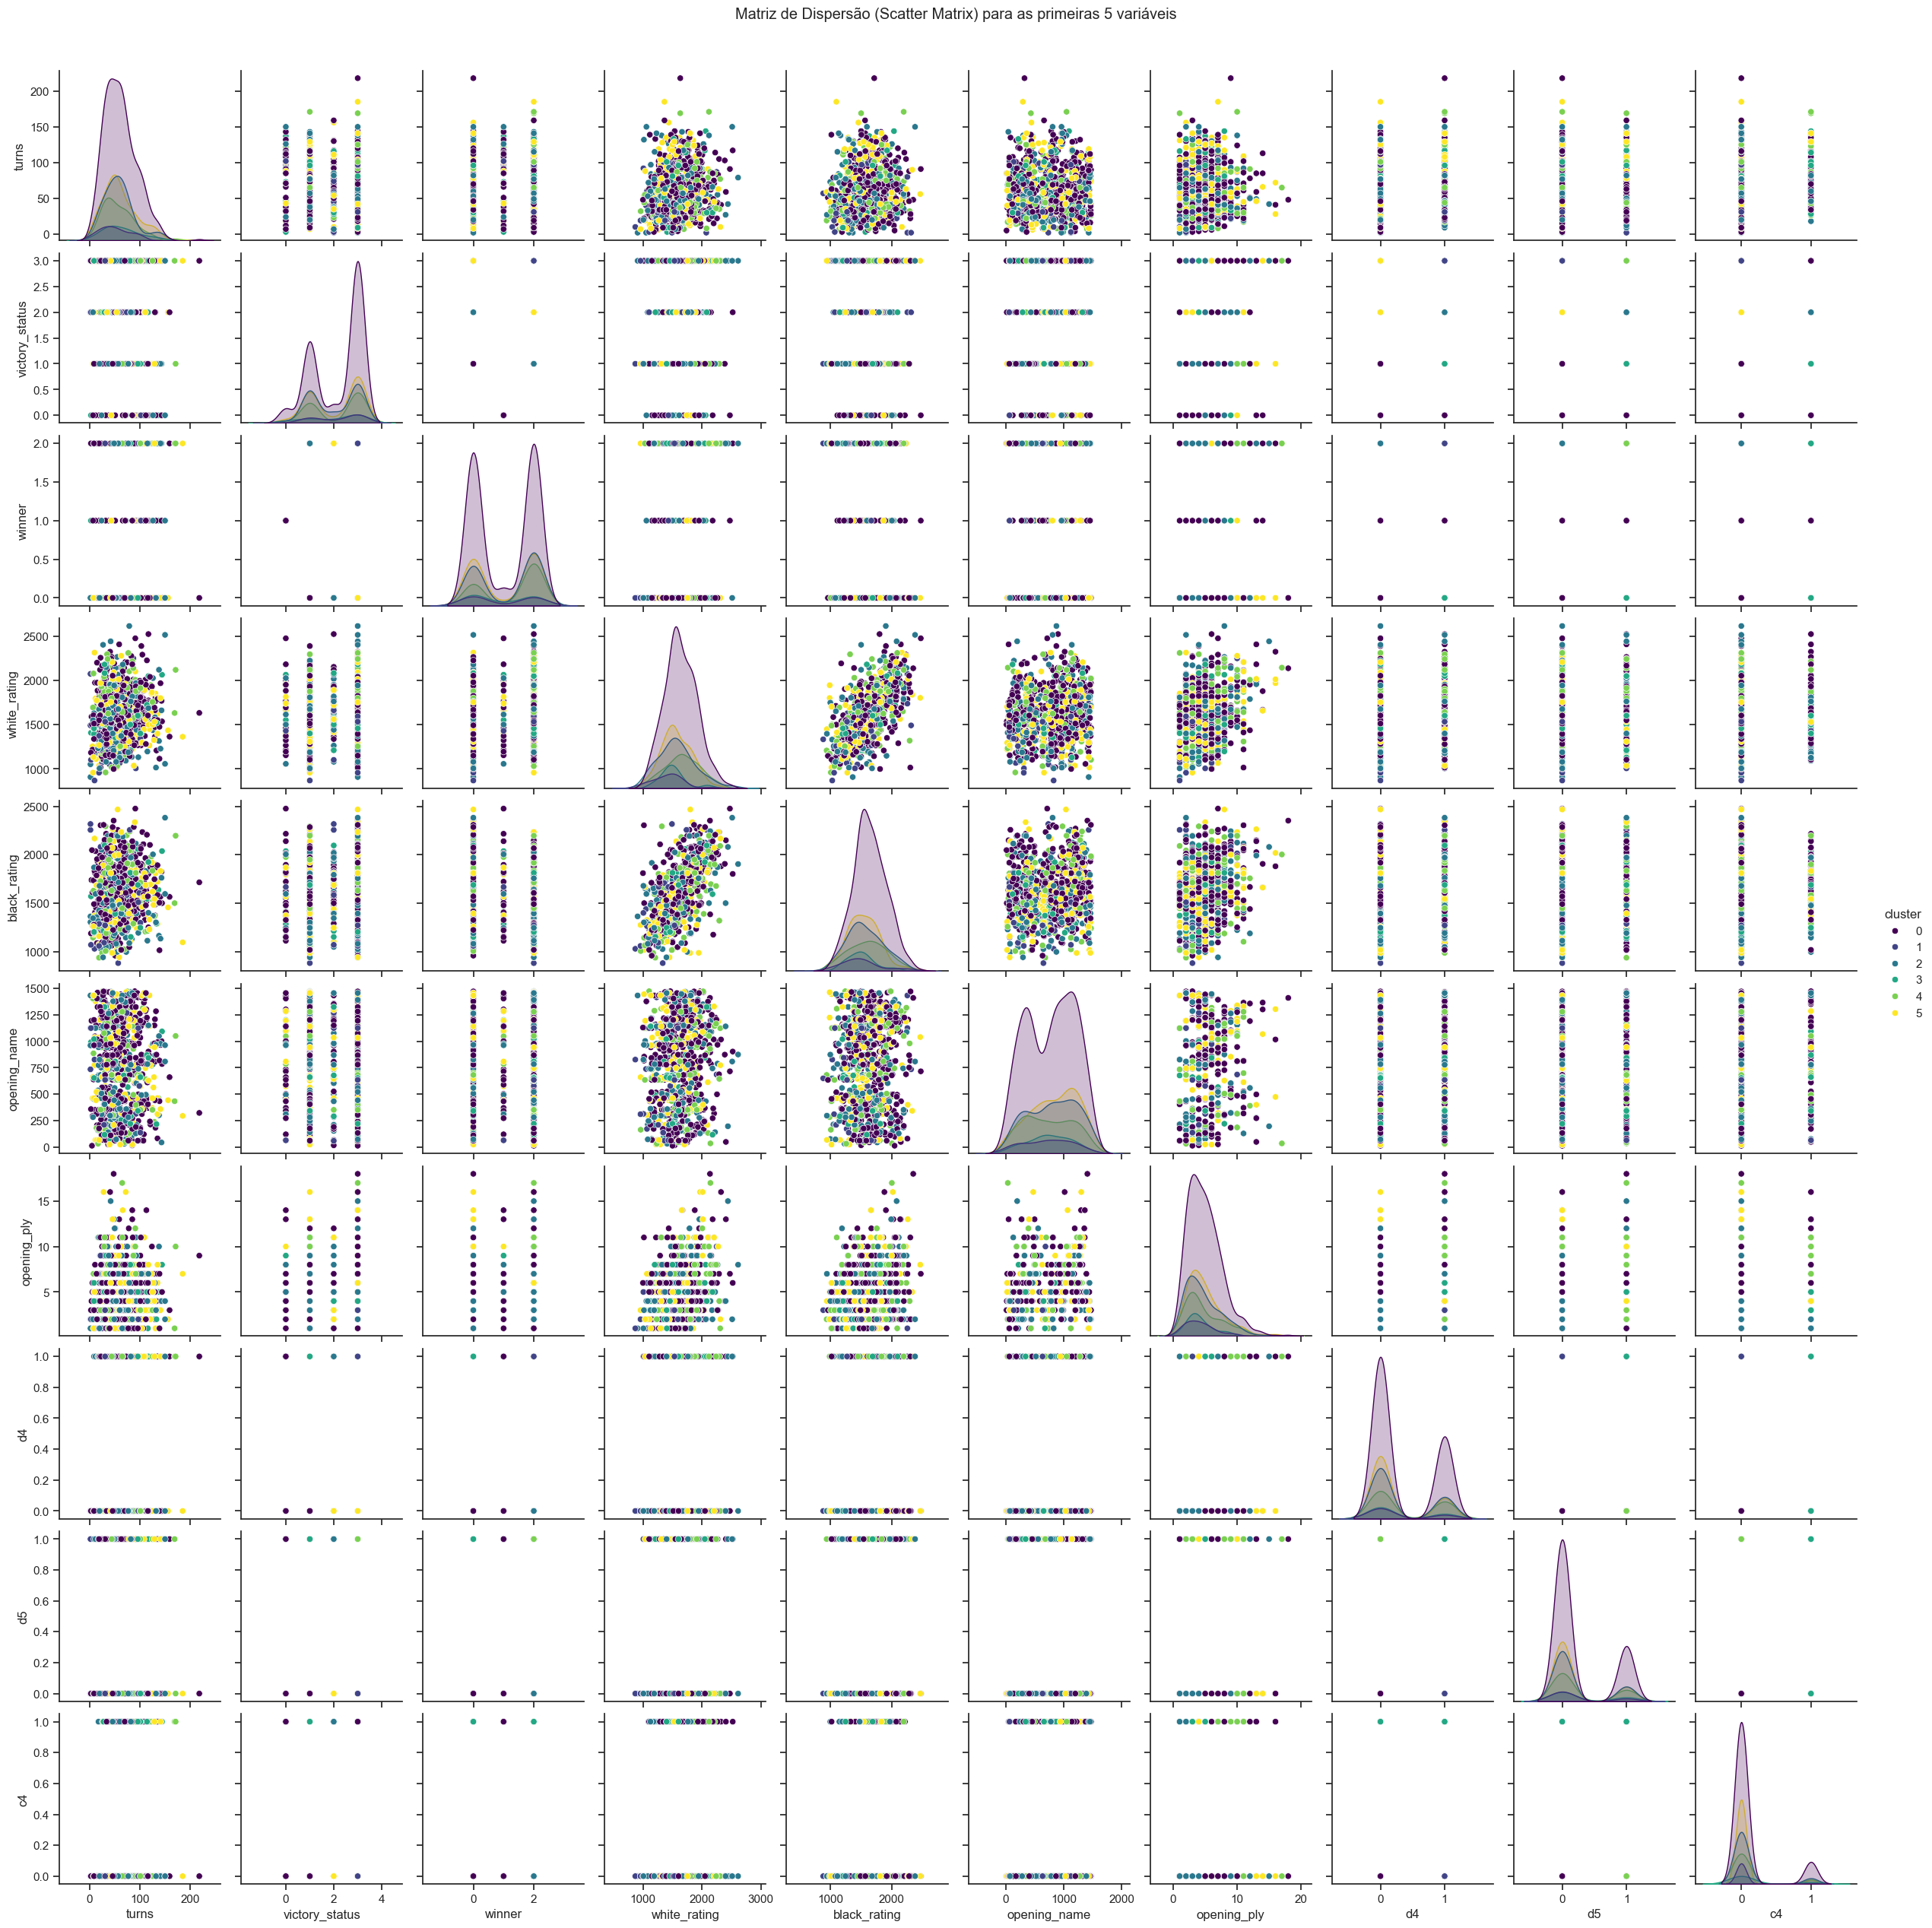

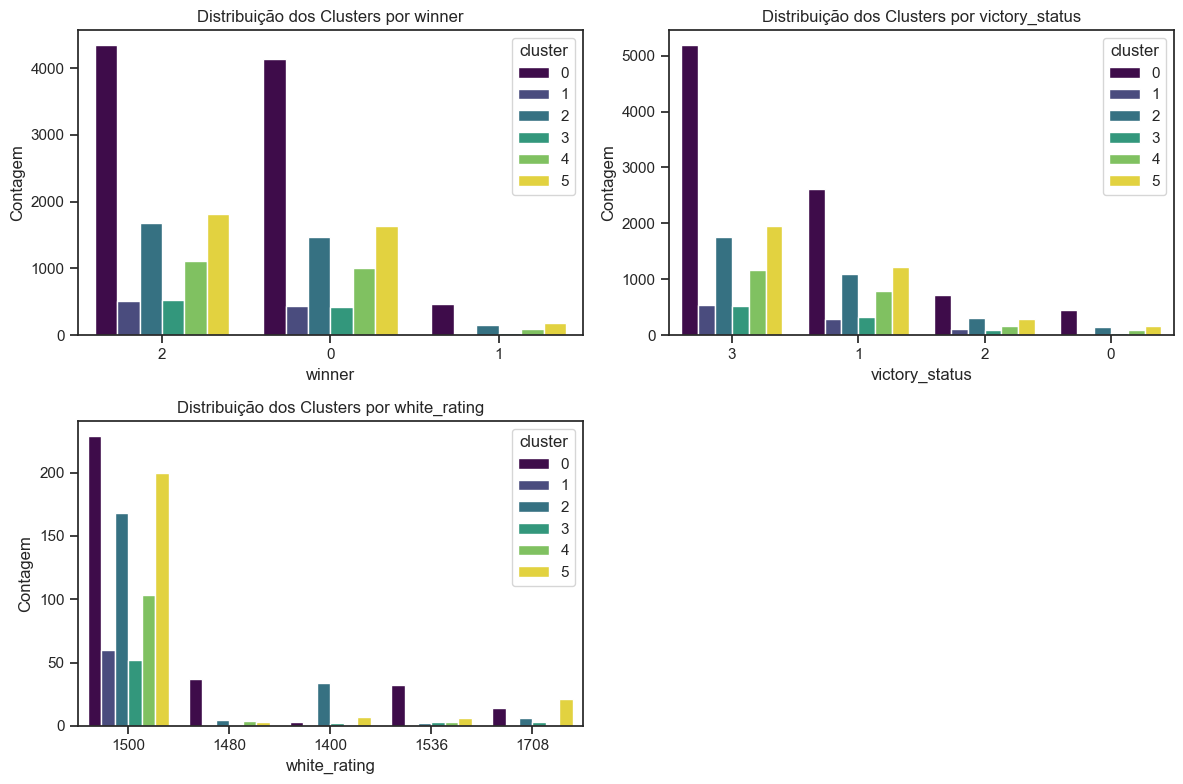

C:\Users\Muril\AppData\Local\Temp\ipykernel_17896\1707438210.py:102: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['cluster'], df['e4'], alpha=0.6, s=10, cmap='viridis')


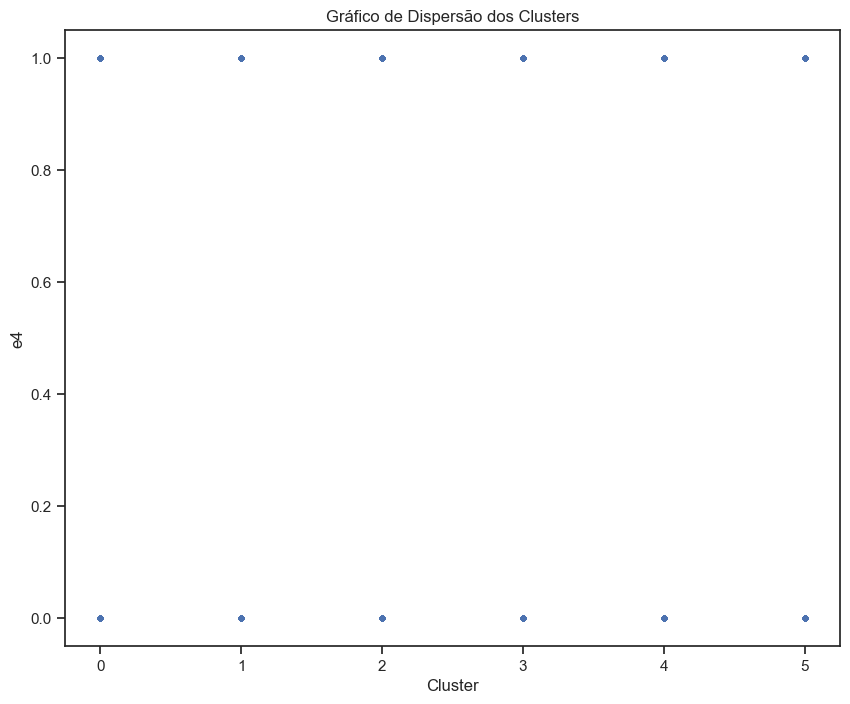

In [8]:
df = pd.read_csv('DataSet\\games.csv')

df.columns = df.columns.str.strip()

df.dropna()

df.drop(
    ['id', 'created_at', 'white_id', 'black_id', 'increment_code', 'opening_eco'],
    axis = 1,
    inplace = True
)


# print(df)

top10 = []
le = LabelEncoder()

print("Comecou!!")

# moves = moves.T
df['moves'] = df["moves"].str.split()
moves = df['moves']
i = 0


for sublist in moves:
    moves = sublist[0: 10: 2]
    for item in sublist:
        if item in df.loc[i, 'moves']:
            df.loc[i, item] = 1
    i += 2
    if i > 20056:
        break


rows = df.shape[0] 
cols = df.shape[1] 
print("Rows: " + str(rows)) 
print("Columns: " + str(cols)) 

df = df.fillna((int)(0))


df.drop(
    [ 'moves'],
    axis = 1,
    inplace = True
)
#######################################################################################

vic = df['victory_status'] = le.fit_transform(df['victory_status'])
winner = df['winner'] = le.fit_transform(df['winner'])
# df['increment_code'] = le.fit_transform(df['increment_code'])
# df['opening_eco'] = le.fit_transform(df['opening_eco'])
name = df['opening_name'] = le.fit_transform(df['opening_name'])

Y = df['winner']
X = df.drop(['winner'], axis = 1)

# Seu código existente aqui ...

# Clusterização
model = MiniBatchKMeans(n_clusters=6,
                        random_state=5464,
                        batch_size=40,
                        n_init="auto")
model.fit(X)
dump(model, 'chess.pkl')

preds = model.predict(X)
df['cluster'] = preds

X_train, X_test, y_train, y_test = train_test_split(X, preds, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

matriz = []


plt.figure(figsize=(10, 8))
sns.set(style="ticks")
sns.pairplot(df.sample(1000), vars=df.columns[2:12], hue='cluster', palette='viridis')
plt.suptitle('Matriz de Dispersão (Scatter Matrix) para as primeiras 5 variáveis', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
important_vars = ['winner', 'victory_status', 'white_rating']
for i, col in enumerate(important_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='cluster', palette='viridis', order=df[col].value_counts().iloc[:5].index)
    plt.title(f'Distribuição dos Clusters por {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(df['cluster'], df['e4'], alpha=0.6, s=10, cmap='viridis')
plt.title('Gráfico de Dispersão dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('e4')
plt.show()


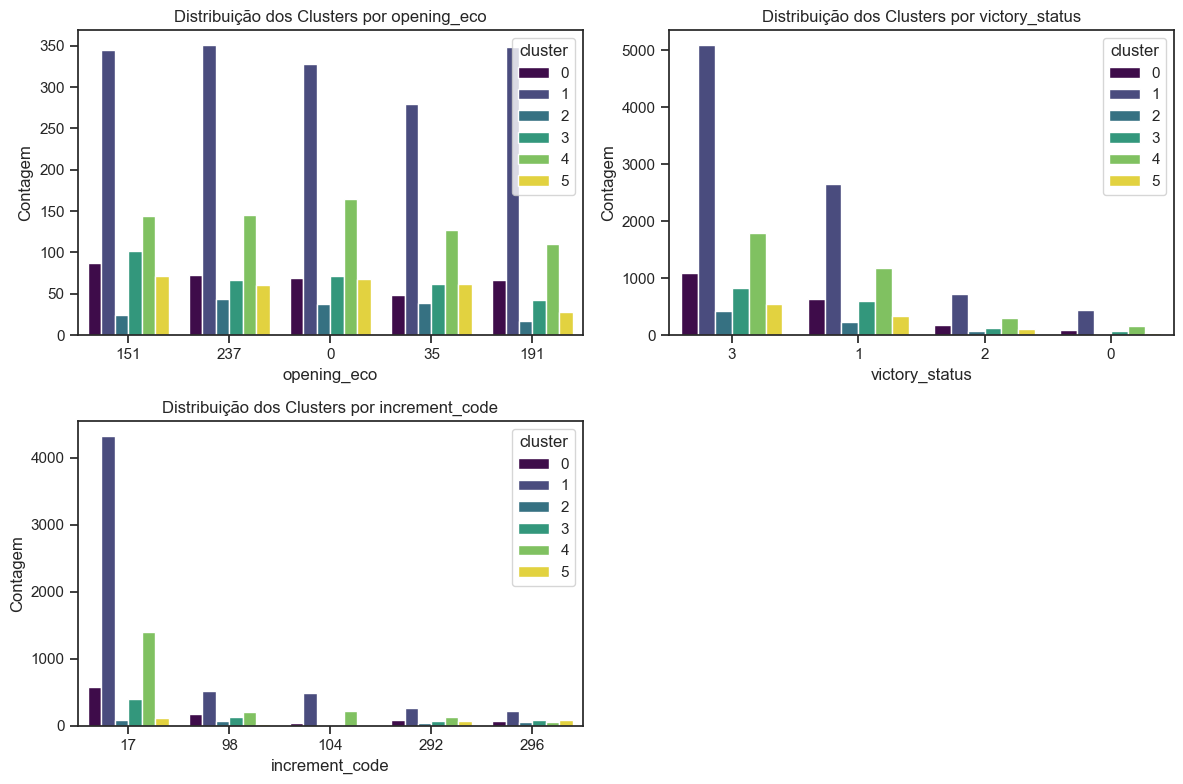

KeyError: 'e4'

<Figure size 1000x800 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder
from joblib import dump

# Carregar o conjunto de dados e pré-processá-lo
df = pd.read_csv('DataSet\\games.csv')
df.columns = df.columns.str.strip()
df.dropna(inplace=True)
df.drop(['id', 'created_at', 'white_id', 'black_id'], axis=1, inplace=True)

# Filtrar as partidas que incluem a jogada específica (ex: 'd4')
df['moves'] = df['moves'].str.contains('d4')
df = df[df['moves']]

# Codificar as variáveis categóricas
le = LabelEncoder()
df['victory_status'] = le.fit_transform(df['victory_status'])
df['winner'] = le.fit_transform(df['winner'])
df['increment_code'] = le.fit_transform(df['increment_code'])
df['opening_eco'] = le.fit_transform(df['opening_eco'])
df['opening_name'] = le.fit_transform(df['opening_name'])

# Separar os dados
Y = df['winner']
X = df.drop(['winner'], axis=1)

# Clusterização
model = MiniBatchKMeans(n_clusters=6,
                        random_state=5464,
                        batch_size=20,
                        n_init="auto")
model.fit(X)
dump(model, 'chess.pkl')

# Prevendo os clusters para os dados
preds = model.predict(X)
df['cluster'] = preds

# Visualização: Distribuição dos Clusters em Relação às Variáveis Importantes
plt.figure(figsize=(12, 8))
important_vars = ['opening_eco', 'victory_status', 'increment_code']
for i, col in enumerate(important_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='cluster', palette='viridis', order=df[col].value_counts().iloc[:5].index)
    plt.title(f'Distribuição dos Clusters por {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Visualização: Gráfico de Dispersão dos Clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['cluster'], df['e4'], alpha=0.6, s=10, cmap='viridis')
plt.title('Gráfico de Dispersão dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('e4')
plt.show()

C:\Users\disrct\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


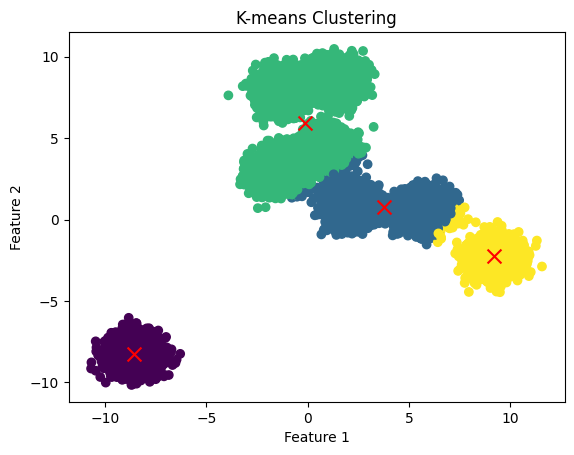

In [37]:
np.random.seed(0)
n_samples = 20000
X, y = make_blobs(n_samples=n_samples, centers=8, cluster_std=0.60, random_state=0)
# Perform K-means clustering
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(X)
# Assign cluster labels to each data point
labels = kmeans.labels_
# Plot the data points and their cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()